## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
totalmice = combined_df["Mouse ID"].nunique()
totalmice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_miceID = combined_df.loc[combined_df.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicate_miceID

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_micedf = combined_df.loc[combined_df["Mouse ID"] == "g989", :]
duplicate_micedf


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaneddf = combined_df[combined_df['Mouse ID'].isin(duplicate_miceID)==False]
cleaneddf

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
cleanedmice = cleaneddf["Mouse ID"].nunique()
cleanedmice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = cleaneddf['Tumor Volume (mm3)'].groupby(cleaneddf['Drug Regimen']).mean()
median = cleaneddf['Tumor Volume (mm3)'].groupby(cleaneddf['Drug Regimen']).median()
variance = cleaneddf['Tumor Volume (mm3)'].groupby(cleaneddf['Drug Regimen']).var()
stddev = cleaneddf['Tumor Volume (mm3)'].groupby(cleaneddf['Drug Regimen']).std()
sem = cleaneddf['Tumor Volume (mm3)'].groupby(cleaneddf['Drug Regimen']).sem()

# Assemble the resulting series into a single summary dataframe.
tvol_summarydf = pd.DataFrame({
    "Mean Tumor Volume":mean,
    "Median Tumor Volume":median,
    "Tumor Volume Variance": variance,
    "Tumor Volume Std. Dev.": stddev,
    "Tumor Volume SEM": sem
    }).style.format("{:.2f}")

tvol_summarydf


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
tvagg_summarydf = cleaneddf.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem']).style.format("{:.2f}")
tvagg_summarydf

## Bar and Pie Charts

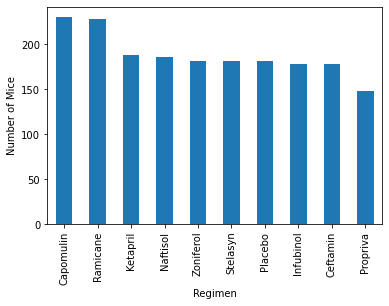

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

#count the total number of timepoints per regimen
regimencount = cleaneddf["Drug Regimen"].value_counts()
regimencount

#create pandas bar chart
bar_pandas = regimencount.plot.bar()

#add axis labels
plt.xlabel("Regimen")
plt.ylabel("Number of Mice");


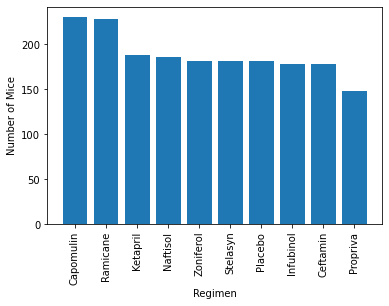

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

#first create x and y axes 
x_axis = regimencount.index.values
y_axis = regimencount.values

#create pyplot bar chart 
bar_py = plt.bar(x_axis, y_axis, align='center')

#add axis labels and turn regimen names to vertical
plt.xlabel("Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation='vertical')

#display the graph
plt.show()


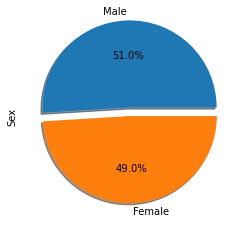

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

#count the totals for each gender
gendercount = cleaneddf["Sex"].value_counts()
gendercount

#create pandas bar chart
pie_pandas = gendercount.plot.pie(autopct="%1.1f%%", shadow=True, explode=(0.1, 0));

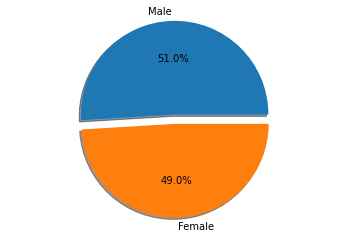

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#first create pie values 
genders = gendercount.index.values
totals = gendercount.values

#create pyplot bar chart 
pie_py = plt.pie(totals, explode = (0.1,0), labels=genders, 
                 autopct="%1.1f%%", shadow=True);

#ensure equal axes
plt.axis("equal")

#display the graph
plt.show()

## Quartiles, Outliers and Boxplots

In [25]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#create individual dataframe for each drug
capomulin_df = cleaneddf.loc[cleaneddf["Drug Regimen"] == "Capomulin",:]
ramicane_df = cleaneddf.loc[cleaneddf["Drug Regimen"] == "Ramicane",:]
infubinol_df = cleaneddf.loc[cleaneddf["Drug Regimen"] == "Infubinol",:]
ceftamin_df = cleaneddf.loc[cleaneddf["Drug Regimen"] == "Ceftamin",:]

# Start by getting the last (greatest) timepoint for each mouse
capmax = capomulin_df["Timepoint"].max()
rammax = ramicane_df["Timepoint"].max()
infmax = infubinol_df["Timepoint"].max()
cefmax = ceftamin_df["Timepoint"].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
